**Classification of the mushrooms in 'edible' and 'poisonous' classes based on their various physical properties.**

In [ ]:
##Importing Necessary Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
## Reading the dataset
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

In [201]:
# Checking the number of rows and columns in dataset
data.shape

(8124, 23)

**Dataset has 8124 rows and 23 columns (22 features and 1 target column)**

In [202]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

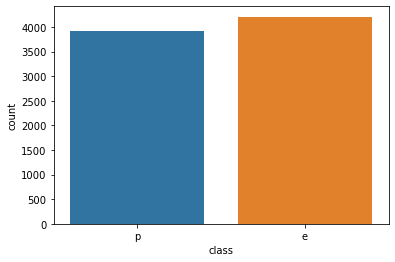

In [210]:
sns.countplot(data['class'])

**Target has 2 classes, 'e'(Edible) and 'p'(Poisonous) and both are present in balanced proportion.**

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**All the columns are with object datatype with no null values**

In [212]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**This further confirms that we do not have null values in our dataset.**

In [213]:
##Lets check unique values in each column
for i in data.columns:
    print(i,data[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


**All the columns contain catagorical data.
Hence, applying label encoding to get the data in a format which can be understood by ML algorithms**

In [363]:
from sklearn.preprocessing import LabelEncoder

In [364]:
labenc=LabelEncoder()
for column in data.columns:
    data[column]=labenc.fit_transform(data[column])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [365]:
for i in data.columns:
    print(i,data[i].unique())

class [1 0]
cap-shape [5 0 4 2 3 1]
cap-surface [2 3 0 1]
cap-color [4 9 8 3 2 5 0 7 1 6]
bruises [1 0]
odor [6 0 3 5 2 1 8 7 4]
gill-attachment [1 0]
gill-spacing [0 1]
gill-size [1 0]
gill-color [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape [0 1]
stalk-root [3 2 1 4 0]
stalk-surface-above-ring [2 0 1 3]
stalk-surface-below-ring [2 0 3 1]
stalk-color-above-ring [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring [7 6 3 0 4 2 8 5 1]
veil-type [0]
veil-color [2 0 1 3]
ring-number [1 2 0]
ring-type [4 0 2 1 3]
spore-print-color [2 3 6 1 7 5 4 8 0]
population [3 2 0 4 5 1]
habitat [5 1 3 0 4 6 2]


In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

**Successfully encoded all the catagorical data in to numeric form**

**Since feature 'veil-type' has only 1 catagory, it is essencially meaningless and hence we will drop it**

In [367]:
data=data.drop(columns=['veil-type'],axis=1)

In [368]:
data.shape

(8124, 22)

### Seperating Features and Label

In [369]:
X=data.drop('class',axis=1)
y=data['class']

### Feature selction using SelectPercentile

In [225]:
#Importing necessory 
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [226]:
SPercentile=SelectPercentile(score_func=chi2)

In [227]:
SPercentile=SPercentile.fit(X,y)

In [228]:
cols=SPercentile.get_support(indices=True)
features=X.columns[cols]

In [229]:
df_scores=pd.DataFrame({'features': X.columns,'Chi2score':SPercentile.scores_,'pValues':SPercentile.pvalues_})
df_scores.sort_values(by='Chi2score',ascending=False)

,features,Chi2score,pValues
8,gill-color,5957.764469,0.000000e+00
17,ring-type,1950.610146,0.000000e+00
7,gill-size,1636.606833,0.000000e+00
3,bruises,1194.277352,1.069037e-261
10,stalk-root,1186.029221,6.630617e-260
6,gill-spacing,826.795274,8.061293e-182
20,habitat,751.309489,2.082916e-165
18,spore-print-color,379.132729,1.922119e-84
19,population,311.766736,9.002366e-70
11,stalk-surface-above-ring,222.982400,2.022392e-50


**Since the p-values for all the features are greater than 0.05 & number of features is not too large, we will keep all the features for analysis.**

### Scaling the features data

In [370]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [371]:
X=scaler.fit_transform(X)

### Splitting the data into train test sets

In [372]:
from sklearn.model_selection import train_test_split

In [373]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Model 1: Logistic Regression

In [374]:
#importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [375]:
logreg=LogisticRegression()

In [376]:
##Fitting logistic regression model to training data
logreg.fit(X_train,y_train)

LogisticRegression()

In [377]:
y_pred=logreg.predict(X_test)

In [380]:
##Importing classification performance metrics
from sklearn.metrics import r2_score,confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

In [386]:
accuracy_score(y_test,y_pred)

0.9551944854751354

In [387]:
cross_val_score(logreg,X,y,cv=5).mean()

0.8301065555134521

In [388]:
score_diff_logreg=accuracy_score(y_test,y_pred)-cross_val_score(logreg,X,y,cv=5).mean()
score_diff_logreg

0.12508792996168328

In [389]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1040
           1       0.95      0.96      0.95       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



# Model 2: SVC

In [390]:
from sklearn.svm import SVC

In [391]:
svc=SVC()

In [392]:
svc.fit(X_train,y_train)

SVC()

In [393]:
y_predSVC=svc.predict(X_test)

In [394]:
accuracy_score(y_test,y_predSVC)

1.0

In [395]:
cross_val_score(svc,X,y,cv=5).mean()

0.8702213717317167

In [398]:
score_diff_svc=accuracy_score(y_test,y_predSVC)-cross_val_score(svc,X,y,cv=5).mean()
score_diff_svc

0.12977862826828335

In [399]:
print(classification_report(y_test,y_predSVC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Model 3: KNN

In [410]:
from sklearn.neighbors import KNeighborsClassifier

In [411]:
knn=KNeighborsClassifier()

In [412]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [413]:
y_predKNN=knn.predict(X_test)

In [414]:
knn.score(X_test,y_test)

1.0

In [415]:
accuracy_score(y_test,y_predKNN)

1.0

In [416]:
cross_val_score(knn,X,y,cv=5).mean()

0.8797053429329292

In [418]:
score_diff_knn=accuracy_score(y_test,y_predKNN)-cross_val_score(knn,X,y,cv=5).mean()
score_diff_knn

0.12029465706707076

In [419]:
print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Model 4: GradientBoosting classifier

In [431]:
from sklearn.ensemble import GradientBoostingClassifier

In [432]:
gbc=GradientBoostingClassifier()

In [433]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [434]:
y_predGBC=gbc.predict(X_test)

In [435]:
accuracy_score(y_test,y_predGBC)

1.0

In [436]:
gbc.score(X_test,y_test)

1.0

In [475]:
cross_val_score(gbc,X,y,cv=5).mean()

0.9162760894278137

In [476]:
score_diff_gbc=gbc.score(X_test,y_test)-cross_val_score(gbc,X,y,cv=5).mean()
score_diff_gbc

0.08372391057218631

In [440]:
print(classification_report(y_test,y_predGBC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Model 5: Decision Tree Classifier

In [477]:
from sklearn.tree import DecisionTreeClassifier

In [478]:
dt=DecisionTreeClassifier()

In [479]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [480]:
y_predDT=dt.predict(X_test)

In [481]:
accuracy_score(y_test,y_predDT)

1.0

In [482]:
dt.score(X_test,y_test)

1.0

In [486]:
cross_vald_score=cross_val_score(dt,X,y,cv=5).mean()
cross_vald_score

0.9261229253505115

In [487]:
score_diff_dt=dt.score(X_test,y_test)-cross_vald_score
score_diff_dt

0.07387707464948845

In [474]:
cross_val_score(dt,X,y,cv=5).mean()

0.9143002652519894

## ROC_AUC score, ROC_curve

In [179]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

In [490]:
## roc_auc_score for Logistic Regression
roc_auc_score(y_test,y_pred)

0.9553466777924395

In [492]:
## roc_auc_score for Support Vector Classifier
roc_auc_score(y_test,y_predSVC)

1.0

In [496]:
## roc_auc_score for K-Nearest Neighbours Classifier
roc_auc_score(y_test,y_predKNN)

1.0

In [497]:
## roc_auc_score for Gradient Boosting Classifier
roc_auc_score(y_test,y_predGBC)

1.0

In [498]:
## roc_auc_score for Decision tree Classifier
roc_auc_score(y_test,y_predDT)

1.0

<ipython-input-499-2764a8dc2cdf>:8: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(prop={'size':11},loc='lower_right')


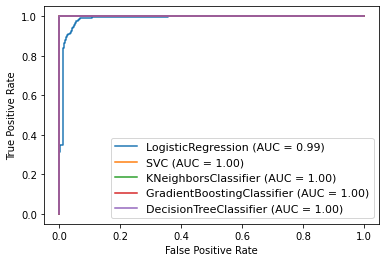

In [499]:
disp=plot_roc_curve(logreg,X_test,y_test)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_) 
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower_right')

- We cannot decide the best model based on roc_curve and roc_auc_score as they are almost same for all models
- Hence, we will use difference between accuracy score and the crosss validation score to select our best model

In [500]:
print('score_diff_logreg: ',score_diff_logreg)
print('score_diff_svc: ',score_diff_svc)
print('score_diff_knn: ',score_diff_knn)
print('score_diff_gbc: ',score_diff_gbc)
print('score_diff_dt: ',score_diff_dt)

score_diff_logreg:  0.12508792996168328
score_diff_svc:  0.12977862826828335
score_diff_knn:  0.12029465706707076
score_diff_gbc:  0.08372391057218631
score_diff_dt:  0.07387707464948845


**Since the difference between the accuracy score and the cross validation score is least for Decision Tree model, we will chose it as our best model.**

## Tuning the hyperparameters for decision tree model

In [514]:
grid_paramDT={'criterion':['gini','entropy'],'max_depth':range(2,12,1),'min_samples_leaf':range(1,10,1),'min_samples_split':(2,12,2)}

In [515]:
from sklearn.model_selection import GridSearchCV

In [516]:
gridCV=GridSearchCV(dt,grid_paramDT,n_jobs=-1)

In [517]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 12),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': (2, 12, 2)})

In [518]:
gridCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [519]:
dt_best=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=1,min_samples_split=2)

In [520]:
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [521]:
y_pred_Best=dt_best.predict(X_test)

In [522]:
dt_best.score(X_test,y_test)

1.0

In [523]:
accuracy_score(y_test,y_pred_Best)

1.0

In [524]:
cross_val_score(dt_best,X,y,cv=5).mean()

0.9679902993558166

In [527]:
print(classification_report(y_test,y_pred_Best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Saving Our Best Model

In [528]:
import pickle
filename='MushroomCLF_DT.pkl'
pickle.dump(dt_best,open(filename,'wb'))